In [14]:
from __future__ import annotations
from typing import Any 

import json
import matplotlib.pyplot as plt
import pandas as pd

from premise_selection.evaluate import EvalResult, EvalData

In [15]:

PATHS = {
    #"No Coq": "/home/kthompson/coq-modeling/premise-eval/prem-select-no-coq",
    #"No Coq CrossEnt": "/home/kthompson/coq-modeling/premise-eval/prem-select-no-coq-crossent",
    "Select Model": "/home/kthompson/coq-modeling/premise-eval/prem-select",
    "Select Model Opt": "/home/kthompson/coq-modeling/premise-eval/prem-select-opt",
    "Rerank Model": "/home/kthompson/coq-modeling/premise-eval/rerank-pos-opt",
    "TF IDF": "/home/kthompson/coq-modeling/premise-eval/tf-idf",
    "BM25": "/home/kthompson/coq-modeling/premise-eval/bm25",
    #"Hard Premises": "/home/kthompson/coq-modeling/premise-eval/prem-select-no-coq-crossent-pos",
    #"Lemma Premises": "/home/kthompson/coq-modeling/premise-eval/prem-select-lemma",
}

#ATS = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
#ATS = [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100] 
ATS = [1, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300]
names: list[str] = []
recalls_list: list[list[float]] = []
for name, path in PATHS.items():
    with open(path, "r") as fin:
        eval_json_data = json.load(fin)
    eval_data = EvalData.from_json(eval_json_data)
    recalls: list[float] = []
    for k in ATS:
        recall_at_k = eval_data.recall_at(k)
        recalls.append(recall_at_k) 
    names.append(name)
    recalls_list.append(recalls)
    

Text(0.5, 1.0, 'Comparison of Premise Selection Methods')

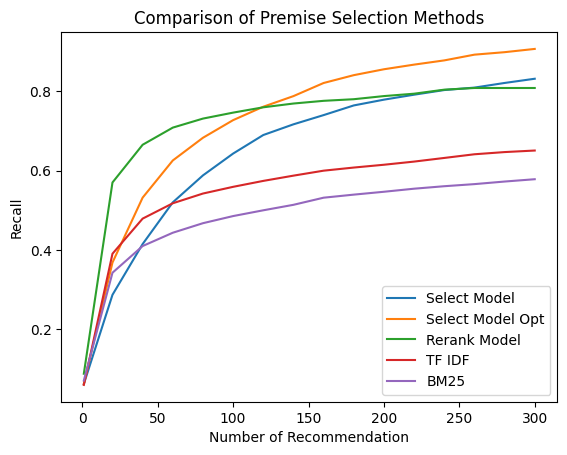

In [16]:
fig, ax = plt.subplots()
for name, recalls in zip(names, recalls_list):
    ax.plot(ATS, recalls, label=name)
ax.set_xlabel("Number of Recommendation")
ax.set_ylabel("Recall")
ax.legend()
ax.set_title("Comparison of Premise Selection Methods")



In [17]:
for name, recall_list in zip(names, recalls_list):
    print(f"{name} top {ATS[0]}: {recall_list[0]}")
    print(f"{name} top {ATS[1]}: {recall_list[1]}")
    print(f"{name} top {ATS[2]}: {recall_list[2]}")
    print()

Select Model top 1: 0.06158978114067204
Select Model top 20: 0.28679521601171587
Select Model top 40: 0.4149377593360996

Select Model Opt top 1: 0.06183386217557563
Select Model Opt top 20: 0.36823692132454644
Select Model Opt top 40: 0.5320966560898218

Rerank Model top 1: 0.08762509153038808
Rerank Model top 20: 0.5703360182247172
Rerank Model top 40: 0.6655276218371166

TF IDF top 1: 0.05939305182653974
TF IDF top 20: 0.3905296558457408
TF IDF top 40: 0.47913107151574325

BM25 top 1: 0.0703766983972012
BM25 top 20: 0.3425270523147018
BM25 top 40: 0.4098934179480921



In [18]:
precisions: list[float] = []
recalls: list[float] = []
for k in ATS:
    precisions.append(eval_data.precision_at(k))
    recalls.append(eval_data.recall_at(k))

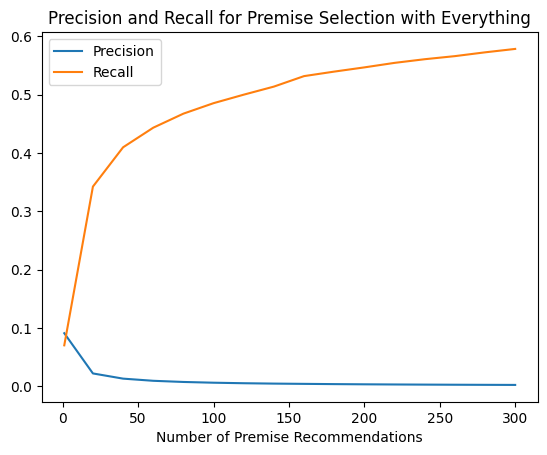

In [19]:
fig, ax = plt.subplots()
ax.plot(ATS, precisions, label="Precision")
ax.plot(ATS, recalls, label="Recall")
ax.set_xlabel("Number of Premise Recommendations")
ax.set_title("Precision and Recall for Premise Selection with Everything")
ax.legend()